In [1]:
# Installing the missing packages in the notebook environment
!pip install yfinance statsmodels matplotlib pandas
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from datetime import datetime, timedelta

In [4]:
# Load the dataset
ticker = 'NVDA'
data = yf.download(ticker, start='2025-01-01', end=datetime.now().strftime('%Y-%m-%d'))
data = data[['Close']]

/var/folders/lh/22w5zzfn4fs82mm7hp75c_0r0000gn/T/ipykernel_83885/2039250897.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2025-01-01', end=datetime.now().strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed


In [5]:
# View the first few rows of the dataset
data.head()

Price,Close
Ticker,NVDA
Date,
2025-01-02,138.279877
2025-01-03,144.438538
2025-01-06,149.397446
2025-01-07,140.109467
2025-01-08,140.079483


/var/folders/lh/22w5zzfn4fs82mm7hp75c_0r0000gn/T/ipykernel_83885/671100579.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Close'].interpolate(method='linear', inplace=True)  # Handle missing values


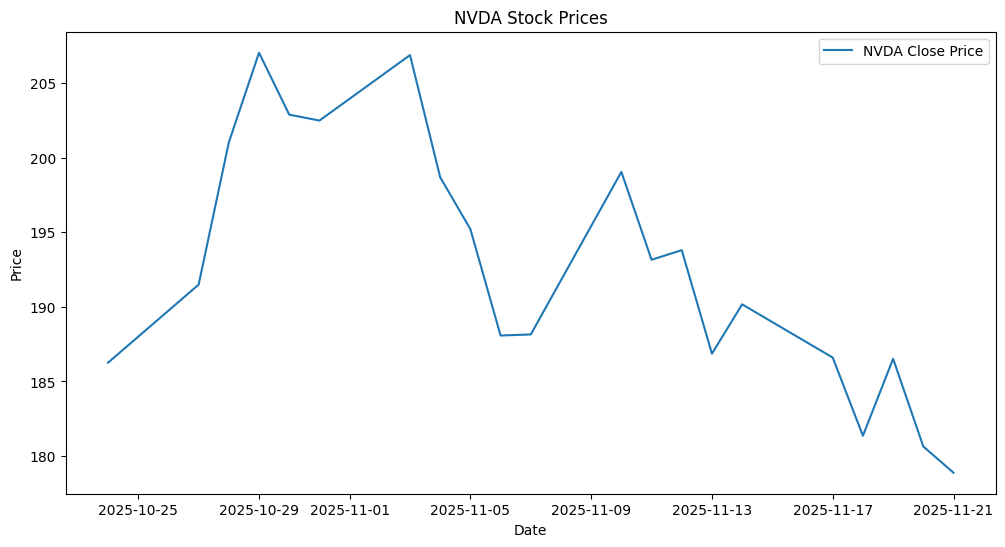

In [16]:
# Read the data from the CSV file (use existing NVDA variable)
data = pd.read_csv(NVDA, index_col='Date', parse_dates=True)

# Ensure the index is datetime
data.index = pd.to_datetime(data.index)

# Ensure there is a numeric Close column (convert from Close/Last if present)
if 'Close' not in data.columns:
	if 'Close/Last' in data.columns:
		data['Close'] = pd.to_numeric(
			data['Close/Last'].astype(str).str.replace(r'[\$,]', '', regex=True),
			errors='coerce'
		)
	else:
		raise KeyError("No 'Close' or 'Close/Last' column found in data")

data = data.asfreq('B')  # Ensure business day frequency
data['Close'].interpolate(method='linear', inplace=True)  # Handle missing values
data = data[['Close']]

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='NVDA Close Price')
plt.title('NVDA Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

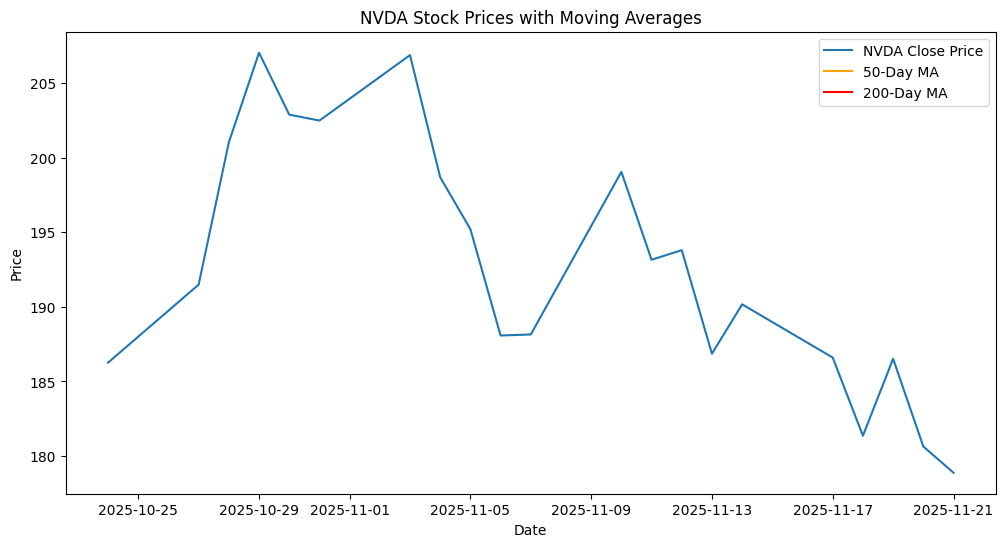

In [13]:
# Ensure there is a numeric Close column (remove $ and commas if present)
if 'Close' not in data.columns:
	if 'Close/Last' in data.columns:
		data['Close'] = pd.to_numeric(
			data['Close/Last'].astype(str).str.replace(r'[\$,]', '', regex=True),
			errors='coerce'
		)
	else:
		raise KeyError("No 'Close' or 'Close/Last' column found in data")

# Moving average
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='NVDA Close Price')
plt.plot(data.index, data['MA50'], label='50-Day MA', color='orange')
plt.plot(data.index, data['MA200'], label='200-Day MA', color='red')
plt.title('NVDA Stock Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()